# This Python script processes a grayscale depth image to convert depth values from millimeters to meters and visually highlights a specific pixel.

<ipython-input-4-6370d0cc77e8>:17: RuntimeWarning: divide by zero encountered in divide
  distance_image = scaling_factor / depth_image_float  # Use the reciprocal of the scaling factor


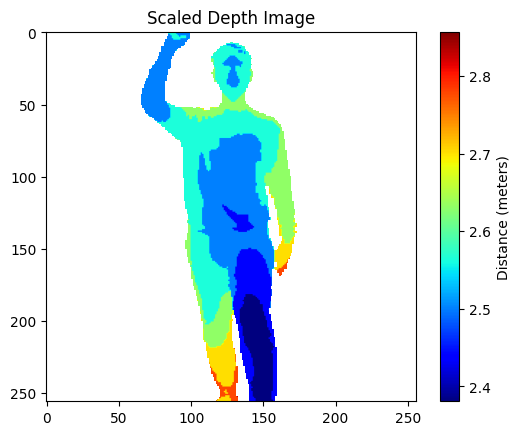

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the depth image
depth_image = cv2.imread('/content/DepthMap20230913023213.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if depth_image is not None:
    # Convert the depth image to floating-point
    depth_image_float = depth_image.astype(np.float32)

    # Define the scaling factor (e.g., 100 to convert from millimeters to meters)
    scaling_factor = 100

    # Scale the depth image to obtain distances in meters
    distance_image = scaling_factor / depth_image_float  # Use the reciprocal of the scaling factor

    # Input pixel coordinates (x, y) you want to query
    x_coordinate = 112  # Replace with your desired x-coordinate
    y_coordinate = 220  # Replace with your desired y-coordinate

    # Check if the coordinates are within the image boundaries
    if 0 <= x_coordinate < distance_image.shape[1] and 0 <= y_coordinate < distance_image.shape[0]:
        # Get the pixel value (distance) at the specified coordinates
        pixel_value = distance_image[y_coordinate, x_coordinate]

        # Create an empty image for highlighting the selected pixel
        highlighted_image = cv2.cvtColor(depth_image, cv2.COLOR_GRAY2BGR)
        highlighted_image = cv2.circle(highlighted_image, (x_coordinate, y_coordinate), 5, (0, 0, 255), -1)  # Draw a red circle at the pixel location

        # Display the scaled depth image with the indicator
        plt.imshow(distance_image, cmap='jet')  # 'jet' colormap is commonly used for depth/distance visualization
        plt.colorbar(label='Distance (meters)')
        plt.title('Scaled Depth Image')
        plt.show()
    else:
        print("Coordinates are out of bounds.")

else:
    print("Failed to load the depth image.")


<ipython-input-57-81193db07a41>:17: RuntimeWarning: divide by zero encountered in divide
  distance_image = scaling_factor / depth_image_float  # Use the reciprocal of the scaling factor


Se han truncado las últimas 5000 líneas del flujo de salida.
Pixel (113, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (114, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (115, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (116, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (117, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (118, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (119, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (120, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (121, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (122, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (123, 163): Original Value = 52, Scaled Value = 1.923076868057251 meters
Pixel (124, 163): Original Value = 52, Scaled Value = 1.92307686805725

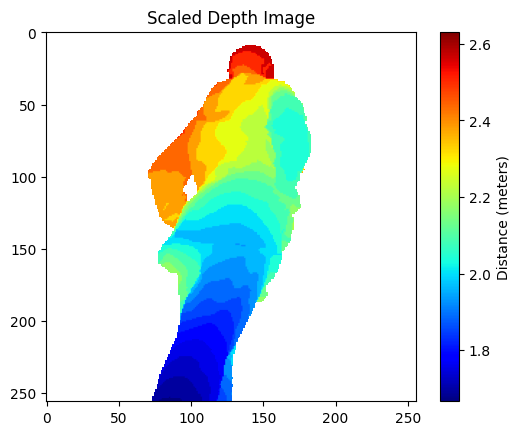

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the depth image
depth_image = cv2.imread('/content/DepthMap20230911040131.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if depth_image is not None:
    # Convert the depth image to floating-point
    depth_image_float = depth_image.astype(np.float32)

    # Define the scaling factor (e.g., 100 to convert from centimeters to meters)
    scaling_factor = 100

    # Scale the depth image to obtain distances in meters
    distance_image = scaling_factor / depth_image_float  # Use the reciprocal of the scaling factor

    # Print the original and scaled pixel values with coordinates (excluding values equal to 0)
    for y in range(distance_image.shape[0]):
        for x in range(distance_image.shape[1]):
            original_value = depth_image[y, x]
            scaled_value = distance_image[y, x]
            if original_value != 0:
                print(f"Pixel ({x}, {y}): Original Value = {original_value}, Scaled Value = {scaled_value} meters")

    # Input pixel coordinates (x, y) you want to query
    x_coordinate = 112  # Replace with your desired x-coordinate
    y_coordinate = 220  # Replace with your desired y-coordinate

    # Check if the coordinates are within the image boundaries
    if 0 <= x_coordinate < distance_image.shape[1] and 0 <= y_coordinate < distance_image.shape[0]:
        # Get the pixel value (distance) at the specified coordinates
        pixel_value = distance_image[y_coordinate, x_coordinate]

        # Create an empty image for highlighting the selected pixel
        highlighted_image = cv2.cvtColor(depth_image, cv2.COLOR_GRAY2BGR)
        highlighted_image = cv2.circle(highlighted_image, (x_coordinate, y_coordinate), 5, (0, 0, 255), -1)  # Draw a red circle at the pixel location

        # Display the scaled depth image with the indicator
        plt.imshow(distance_image, cmap='jet')  # 'jet' colormap is commonly used for depth/distance visualization
        plt.colorbar(label='Distance (meters)')
        plt.title('Scaled Depth Image')
        plt.show()

    else:
        print("Coordinates are out of bounds.")

else:
    print("Failed to load the depth image.")


# This Python script uses the Plotly library, along with NumPy and OpenCV, to visualize a grayscale depth image as a 3D surface plot.

In [26]:
import plotly.graph_objects as go
import numpy as np
import cv2

# Load your depth image (assumed to be in a file called 'depth_image.png')
depth_image = cv2.imread('/content/DepthMap20240405043343.png', cv2.IMREAD_GRAYSCALE)
if depth_image is None:
    print("Image load failed.")
    exit()

# Convert the depth image to a float array (assuming the values are in mm)
depth_data = depth_image.astype(np.float32)

# Convert mm to meters if necessary
depth_data = depth_data / 1000.0

# Generate x, y coordinate grid
y, x = np.mgrid[0:depth_data.shape[0], 0:depth_data.shape[1]]

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=depth_data, x=x, y=y)])

# Customize layout
fig.update_layout(title='3D Surface Plot of Depth Data', autosize=True,
                  margin=dict(l=65, r=50, b=65, t=90))

# Show plot
fig.show()
